In [1]:
%matplotlib inline
import sys
print('Python Version: {}'.format(sys.version))

import pandas as pd
print('pandas version: {}'.format(pd.__version__))

import matplotlib
print('matplotlib version: {}'.format(matplotlib.__version__))

import numpy as np
print('numpy version: {}'.format(np.__version__))

import scipy as sp
print('scipy version: {}'.format(sp.__version__))

import IPython
print('ipython version: {}'.format(IPython.__version__))

import sklearn
print('scikit-learn version: {}'.format(sklearn.__version__))

import matplotlib.pyplot as plt

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
matplotlib.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
plt.rcParams["font.family"] = 'AppleGothic'

import mglearn

from IPython.display import display

Python Version: 3.5.3 |Anaconda custom (x86_64)| (default, Mar  6 2017, 12:15:08) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]
pandas version: 0.20.3
matplotlib version: 2.0.2
numpy version: 1.13.1
scipy version: 0.19.1
ipython version: 6.0.0
scikit-learn version: 0.19.0


In [2]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X, y = make_blobs(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression().fit(X_train, y_train)
print('테스트 세트 점수: {:.3f}'.format(logreg.score(X_test, y_test)))

테스트 세트 점수: 0.880


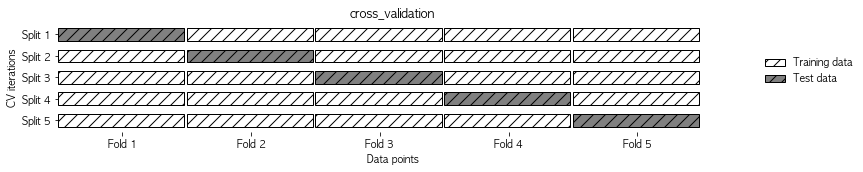

In [3]:
mglearn.plots.plot_cross_validation()

In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression()

scores = cross_val_score(logreg, iris.data, iris.target)
print('교차 검증 점수: {}'.format(scores))

교차 검증 점수: [ 0.96078431  0.92156863  0.95833333]


In [5]:
scores = cross_val_score(logreg, iris.data, iris.target, cv=5)
print('교차 검증 점수: {}'.format(scores))

교차 검증 점수: [ 1.          0.96666667  0.93333333  0.9         1.        ]


In [6]:
print('교차 검증 평균 점수: {:.3f}'.format(scores.mean()))

교차 검증 평균 점수: 0.960


In [7]:
from sklearn.datasets import load_iris

iris = load_iris()
print('Iris 레이블:\n{}'.format(iris.target))

Iris 레이블:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


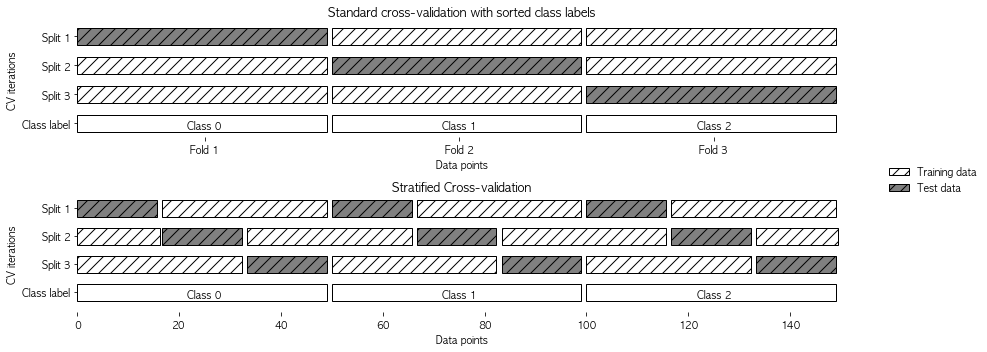

In [8]:
mglearn.plots.plot_stratified_cross_validation()

In [9]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5)

print('교차 검증 점수:\n{}'.format(cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

교차 검증 점수:
[ 1.          0.93333333  0.43333333  0.96666667  0.43333333]


In [10]:
kfold = KFold(n_splits=3)
print('교차 검증 점수:\n{}'.format(cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

교차 검증 점수:
[ 0.  0.  0.]


In [11]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print('교차 검증 점수:\n{}'.format(cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

교차 검증 점수:
[ 0.9   0.96  0.96]


In [12]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print('교차 검증 분할 횟수: ', len(scores))
print('평균 정확도: {:.3f}'.format(scores.mean()))

교차 검증 분할 횟수:  150
평균 정확도: 0.953


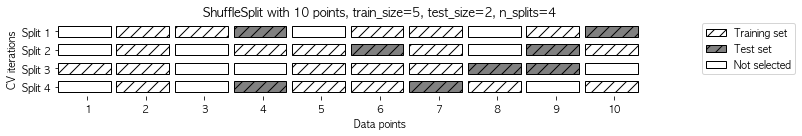

In [13]:
mglearn.plots.plot_shuffle_split()

In [15]:
from sklearn.model_selection import ShuffleSplit

shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print('교차 검증 점수:\n{}'.format(scores))

교차 검증 점수:
[ 0.92        0.97333333  0.96        0.96        0.85333333  0.94666667
  0.97333333  0.93333333  0.90666667  0.84      ]


In [16]:
from sklearn.model_selection import GroupKFold

X, y = make_blobs(n_samples=12, random_state=0)

groups = [0,0,0,1,1,1,1,2,2,3,3,3]
scores = cross_val_score(logreg, X, y, groups, cv=GroupKFold(n_splits=3))
print('교차 검증 점수:\n{}'.format(scores))

교차 검증 점수:
[ 0.75        0.8         0.66666667]


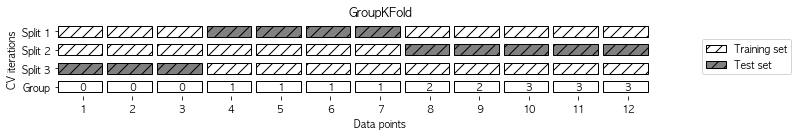

In [17]:
mglearn.plots.plot_group_kfold()